<a href="https://colab.research.google.com/github/mollyhealey3-stack/QNC-Tutorials/blob/main/9_15_2025_power_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Do a post-hoc power analysis to determine the number of data samples needed to achieve 80% power for a series of possible effect sizes. Notes and tips:

Given that the data have already been collected, note that this is technically a "post-hoc" power analysis and is for demonstration purposes only. Normally these analyses must be done before collecting data.
Assume that a "data sample" is simply the non-parametric correlation coefficient between pupil diameter and LC activty measured in a given session.
Thus, to obtain a null distribution of these data samples, compute the correlation coefficients on simulated data that are independently generated from Poisson (for LC spiking data) and Gaussian (for pupil data)distributions.
Then plot n (number of data samples, corresponding to correlation coefficients measured in a single expermental session) needed for 80% power as a function of effect sizes.
To compute power, you can use TTestIndPower in Python, or sampsizepwr in Matlab


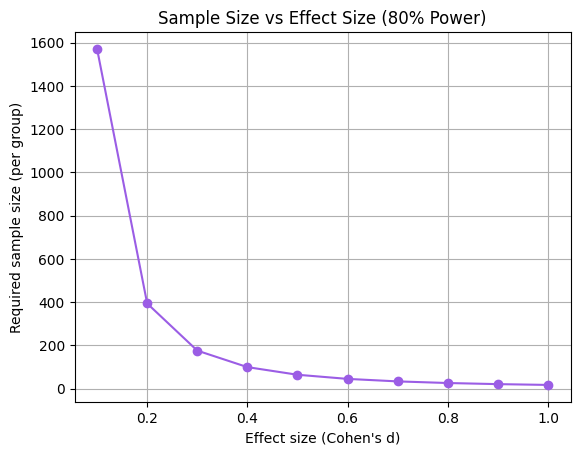

In [4]:
import numpy as np
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

# Initialize power analysis tool
analysis = TTestIndPower()

# Define parameters
power = 0.8        # desired power
alpha = 0.05       # significance level
effect_sizes = np.linspace(0.1, 1.0, 10)  # range of effect sizes (Cohen's d)

# Calculate required sample sizes
sample_sizes = [analysis.solve_power(effect_size=es, alpha=alpha, power=power, alternative='two-sided')
                for es in effect_sizes]

# Plot
plt.plot(effect_sizes, sample_sizes, marker='o', color='#9b5de5')
plt.xlabel("Effect size (Cohen's d)")
plt.ylabel("Required sample size (per group)")
plt.title("Sample Size vs Effect Size (80% Power)")
plt.grid(True)
plt.show()
